In [57]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [60]:
def load_and_preprocess_data():
    # Load datasets
    train_df = pd.read_csv('train.csv')
    
    # Select features and target
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    target = 'Survived'
    
    # Handle missing values
    train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
    train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
    
    # Encode categorical variables
    le = LabelEncoder()
    train_df['Sex'] = le.fit_transform(train_df['Sex'])
    train_df['Embarked'] = le.fit_transform(train_df['Embarked'])
    
    return train_df[features], train_df[target]

In [62]:
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    return rf_model, X.columns

In [64]:
def plot_feature_importance(model, feature_names):
    # Get feature importance scores
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Create figure and axis
    plt.figure(figsize=(10, 6))
    
    # Create bar plot
    bars = plt.bar(range(len(importances)), importances[indices], align='center')
    
    # Customize the plot
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
    plt.title('Feature Importance in Random Forest Model', fontsize=14, pad=20)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Importance Score', fontsize=12)
    
    # Add value labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., yval + 0.005, 
                f'{yval:.3f}', ha='center', va='bottom', fontsize=10)
    
    # Add grid for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Use 'ggplot' style for a clean, professional look
    plt.style.use('ggplot')
    
    # Customize bar colors
    bars[0].set_color('#1f77b4')  # Highlight most important feature
    for bar in bars[1:]:
        bar.set_color('#aec7e8')  # Lighter color for other bars
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Save and show plot
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

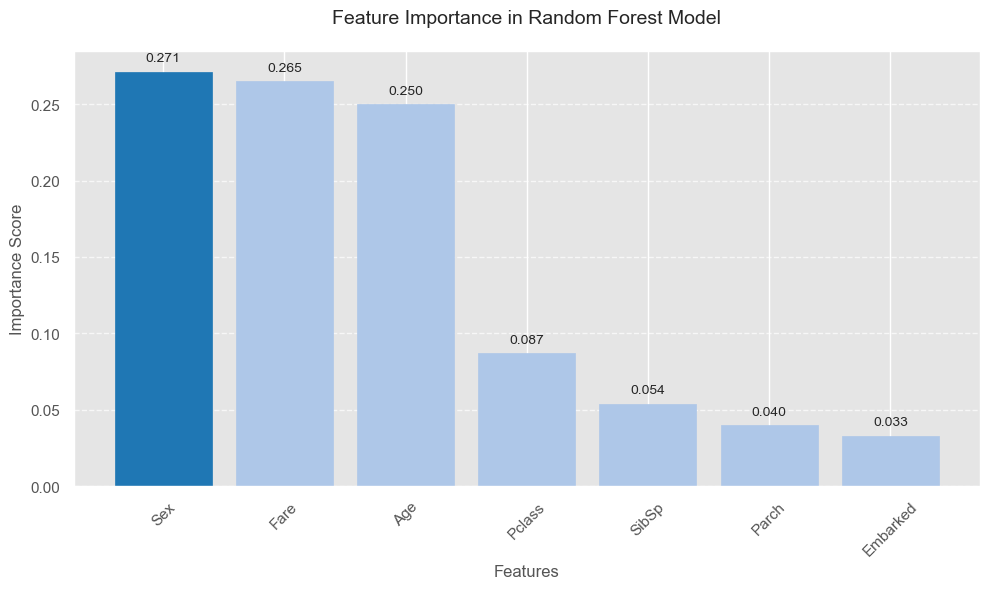

In [66]:
if __name__ == "__main__":
    # Load and preprocess data
    X, y = load_and_preprocess_data()
    
    # Train model and get feature names
    model, feature_names = train_model(X, y)
    
    # Plot feature importance
    plot_feature_importance(model, feature_names)

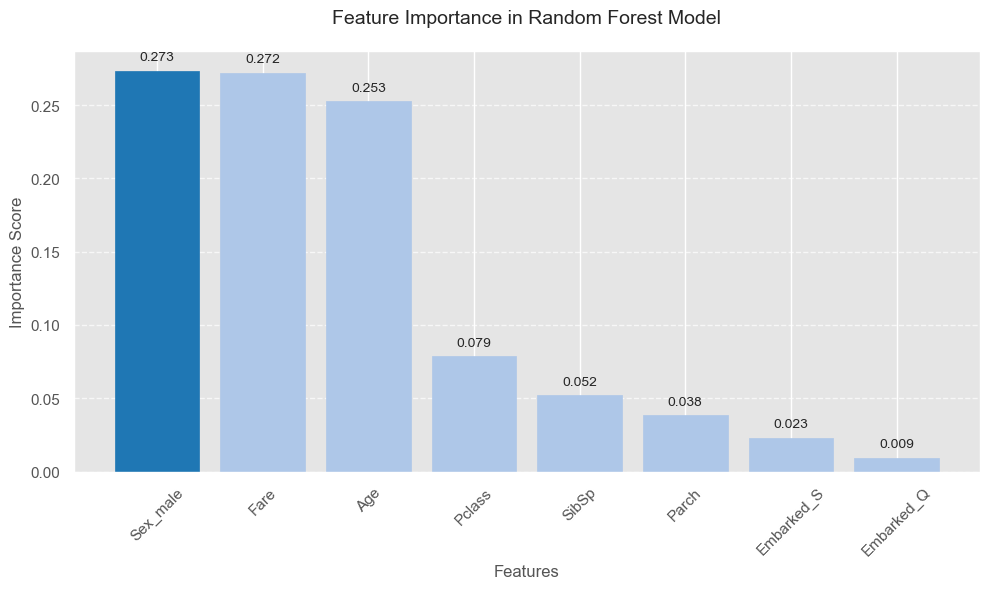

In [75]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Loading and preprocessing data
def load_and_preprocess_data():
    try:
        train_df = pd.read_csv('train.csv')
    except FileNotFoundError:
        print("Error: 'train.csv' not found. Please ensure the file is in the current directory.")
        return None, None
    # Missing values fill karna
    train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
    train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
    # Drop unnecessary columns
    train_df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)
    # Encoding categorical to numeric
    train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
    # Select features and target
    features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
    target = 'Survived'
    X = train_df[features]
    y = train_df[target]
    return X, y

# Training Random Forest model
def train_model(X, y):
    if X is None or y is None:
        return None, None
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model, X.columns

# Visualizing feature importance
def plot_feature_importance(model, feature_names):
    if model is None or feature_names is None:
        print("Error: Invalid input data for plotting. Check if 'train.csv' was loaded correctly.")
        return
    # Get feature importance scores
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Create figure and axis
    plt.figure(figsize=(10, 6))
    
    # Create bar plot
    bars = plt.bar(range(len(importances)), importances[indices], align='center')
    
    # Customize the plot
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
    plt.title('Feature Importance in Random Forest Model', fontsize=14, pad=20)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Importance Score', fontsize=12)
    
    # Add value labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., yval + 0.005, 
                f'{yval:.3f}', ha='center', va='bottom', fontsize=10)
    
    # Add grid for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Use 'ggplot' style for a clean, professional look
    plt.style.use('ggplot')
    
    # Customize bar colors
    bars[0].set_color('#1f77b4')  # Highlight most important feature
    for bar in bars[1:]:
        bar.set_color('#aec7e8')  # Lighter color for other bars
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Save and show plot
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Load and preprocess data
    X, y = load_and_preprocess_data()
    
    # Train model and get feature names
    model, feature_names = train_model(X, y)
    
    # Plot feature importance
    plot_feature_importance(model, feature_names)